2) В переменной df содержатся данные как на картинке

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# создаем таблицу

i = [[9002,6722,8799,8737,5208],
     [1,1,1,0,0],
     ['medium','high','high','low','medium'],
     [63,54,62,54,37]]
j = ['client_id','sex','wealth','age']
df = pd.DataFrame({j[0]:i[0],j[1]:i[1],j[2]:i[2],j[3]:i[3]})
df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


Отберите из них только те, где wealth 'medium', а возраст больше 35, и поместите в переменную medium_35


In [ ]:
medium_35 = df[(df.wealth == 'medium') & (df.age > 35)]
medium_35

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


3) Ваш коллега-новичок перепутал названия колонок в таблице из предыдущих заданий и прислал вам такой вариант

Приведите таблицу к каноничному виду, сохранив её в ту же переменную df, где сейчас находится нестандартно наименнованная таблица (воспользуйтесь методом rename)


In [ ]:
# создаем таблицу

j_rus = ['Клиент id','Пол','Благосостояние','Возраст']
i_rus = [[9002,6722,8799,8737,5208],
     [1,1,1,0,0],
     ['medium','high','high','low','medium'],
     [63,54,62,54,37]]
df_rus = pd.DataFrame({j_rus[0]:i_rus[0],j_rus[1]:i_rus[1],j_rus[2]:i_rus[2],j_rus[3]:i_rus[3]})
df_rus

,Клиент id,Пол,Благосостояние,Возраст
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


In [ ]:
# меняем названия колонок скопом
j = ['client_id','sex','wealth','age']
j_rus_replace_eng = dict(zip(j_rus,j))
df_rus.rename(columns=j_rus_replace_eng)

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


4) Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет храниться больше ли возраст 30 лет (булиновское значение)


In [ ]:
df['older_than_60'] = df['age']>60 # для наглядности на 60 лет поменял
df

,client_id,sex,wealth,age,older_than_60
0,9002,1,medium,63,True
1,6722,1,high,54,False
2,8799,1,high,62,True
3,8737,0,low,54,False
4,5208,0,medium,37,False


5) А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num


In [ ]:
df.nunique()

client_id        5
sex              2
wealth           3
age              4
older_than_60    2
dtype: int64

6) У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида:


In [ ]:
# создаем таблицу для добавления

j_new = ['client_id','amount','date']
i_new = [[5392,9581,7250,8619,6573],
     [42331,88420,1714,80572,57549],
     [1585425830,1585429536,1585427761,1585427077,1585426290]]
df_new = pd.DataFrame({j_new[0]:i_new[0],j_new[1]:i_new[1],j_new[2]:i_new[2]})
df_new

,client_id,amount,date
0,5392,42331,1585425830
1,9581,88420,1585429536
2,7250,1714,1585427761
3,8619,80572,1585427077
4,6573,57549,1585426290


In [ ]:
st = pd.concat([df,df_new],keys='client_id')
st

client_id  sex  wealth   age older_than_60   amount          date
c 0       9002  1.0  medium  63.0          True      NaN           NaN
  1       6722  1.0    high  54.0         False      NaN           NaN
  2       8799  1.0    high  62.0          True      NaN           NaN
  3       8737  0.0     low  54.0         False      NaN           NaN
  4       5208  0.0  medium  37.0         False      NaN           NaN
l 0       5392  NaN     NaN   NaN           NaN  42331.0  1.585426e+09
  1       9581  NaN     NaN   NaN           NaN  88420.0  1.585430e+09
  2       7250  NaN     NaN   NaN           NaN   1714.0  1.585428e+09
  3       8619  NaN     NaN   NaN           NaN  80572.0  1.585427e+09
  4       6573  NaN     NaN   NaN           NaN  57549.0  1.585426e+09

In [ ]:
st2 = pd.merge(df,df_new,how='left',on='client_id')
st2 # inner join выдает пустое множество

,client_id,sex,wealth,age,older_than_60,amount,date
0,9002,1,medium,63,True,NaN,NaN
1,6722,1,high,54,False,NaN,NaN
2,8799,1,high,62,True,NaN,NaN
3,8737,0,low,54,False,NaN,NaN
4,5208,0,medium,37,False,NaN,NaN


In [ ]:
url = "https://github.com/dm-fedorov/pandas_basic/blob/master/data/companies.csv.zip?raw=True"

In [ ]:
def read_n_agg (path):
    df = pd.read_csv(path, compression="zip", sep=';')
    return df.groupby('company').agg({'income':'mean'})
read_n_agg(url)

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


8) Вернемся к данным по поездкам на такси! На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей!

journey_id – уникальный id поездки

user_id – id пользователя

driver_id – id водителя

taxi_id – id машины

icon – тип поездки

start_type – тип заказа (asap, reserved, delayed)

start_at – время начала поездки

start_lat – исходное местоположение пользователя, широта

start_lon – исходное местоположение пользователя, долгота

end_at – время окончания поездки

end_lat – итоговое местоположение, широта

end_lon – итоговое местоположение, долгота

end_state – состояние заказа

driver_start_lat – исходное местоположение водителя, широта

driver_start_lon – исходное местоположение водителя, долгота

arrived_at – время прибытия водителя

source – платформа, с которой сделан заказ

driver_score – оценка водителя клиентом

rider_score – оценка клиента водителем


Импортируйте pandas как pd. Загрузите датасет, используя ; в качестве разделителя.
Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты
(параметр parse_dates). Результат запишите в taxi.

url = "https://github.com/dm-fedorov/pandas_basic/blob/master/data/taxi_peru.csv.zip?raw=True"


In [ ]:
url = "https://github.com/dm-fedorov/pandas_basic/blob/master/data/taxi_peru.csv.zip?raw=True"
df = pd.read_csv(url,compression='zip', sep=';', parse_dates = ['start_at','end_at','arrived_at'])

In [ ]:
df.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

9) Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.


In [ ]:
dfg = round(df.source.value_counts(normalize=True)*100)
dfg.astype(int)

iPhone     42
web        33
Android    21
iPad        2
Wap         1
Name: source, dtype: int64

In [ ]:
df.source.value_counts(normalize=True).round().idxmax()

'iPhone'

10) Проверим, как распределены оценки водителей (driver_score).
Для подготовки данных выполните следующие шаги:

- Посчитайте частоту встречаемости каждой из оценок
- Переведите в проценты и округлите до 2 знаков после точки
- Сбросьте индексы
- Переименуйте колонки в driver_score и percentage
- Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
- Запишите результат в driver_score_counts

Полезные функции:

.mul() – умножение, более удобный вариант для использования в цепочке методов

.round() – округление

.reset_index() – сбросить индекс

.value_counts() – сколько раз встречается каждое значение переменной


In [ ]:
df.driver_score.value_counts()

5.0    4499
4.0    1674
0.0    1094
3.0     227
1.0      94
2.0      62
Name: driver_score, dtype: int64

In [ ]:
driver_score_counts = \
df.driver_score\
                .value_counts(normalize=True)\
                .mul(100).round()\
                .reset_index()\
                .rename(columns = {'index':'оценка','driver_score':'%_оценок_от_клиента'})\
                .sort_values('оценка')
driver_score_counts

,оценка,%_оценок_от_клиента
2,0.0,14.0
4,1.0,1.0
5,2.0,1.0
3,3.0,3.0
1,4.0,22.0
0,5.0,59.0


11) Теперь строим график!

Сначала импортируем библиотеки:

import seaborn as sns


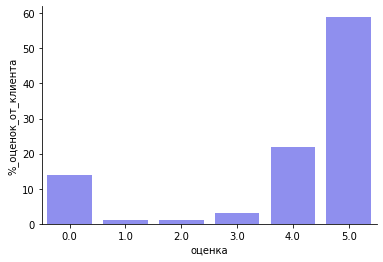

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x=driver_score_counts['оценка'],
y=driver_score_counts['%_оценок_от_клиента'],
data=driver_score_counts,
color='blue',
alpha=0.5)

ax.set(xlabel='оценка', ylabel='%_оценок_от_клиента')
sns.despine()  # убрать часть рамки графика
plt.show()


12)  Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?

In [ ]:
rider_score_counts = \
df.rider_score\
                .value_counts(normalize=True)\
                .mul(100).round()\
                .reset_index()\
                .rename(columns = {'index':'оценка','rider_score':'%_оценок_от_водителя'})\
                .sort_values('оценка')
rider_score_counts

,оценка,%_оценок_от_водителя
2,0.0,2.0
4,1.0,0.0
5,2.0,0.0
3,3.0,1.0
1,4.0,9.0
0,5.0,87.0


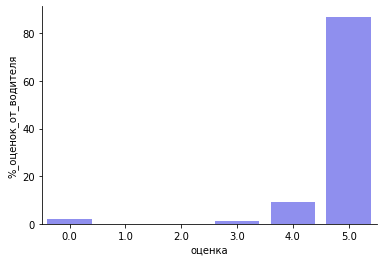

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
bx = sns.barplot(x=rider_score_counts['оценка'],
y=rider_score_counts['%_оценок_от_водителя'],
data=rider_score_counts,
color='blue',
alpha=0.5)

bx.set(xlabel='оценка', ylabel='%_оценок_от_водителя')
sns.despine()  # убрать часть рамки графика
plt.show()


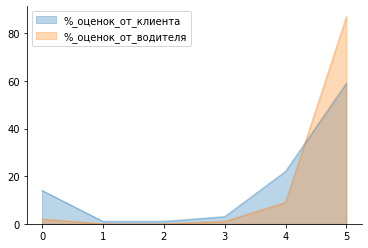

In [ ]:
df_graphic = pd.merge(driver_score_counts,rider_score_counts,how='outer',on='оценка')
df_graphic[['%_оценок_от_клиента','%_оценок_от_водителя']].plot.area(stacked=False, alpha=0.3)
sns.despine()

Водители лучшего мнения о клиентах, чем клиенты о водителях, но в целом и пятерок много с обоих сторон